# SuperFlux Onset Detection Algorithm

method to identify moments where significant audio events(like musical note onsets) occur in a signal.

use spectral flux, rate of change in the power spectrum of the audio signal.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

In [8]:
y, sr = librosa.load(librosa.ex('trumpet', hq = True), sr = 44100)

# parameters taken from the official Boeck and Widmer paper
n_fft = 1024
hop_length = int(librosa.time_to_samples(1 / 200, sr = sr))
lag = 2
n_mels = 138
fmin = 27.5
fmax = 16000
max_size = 3

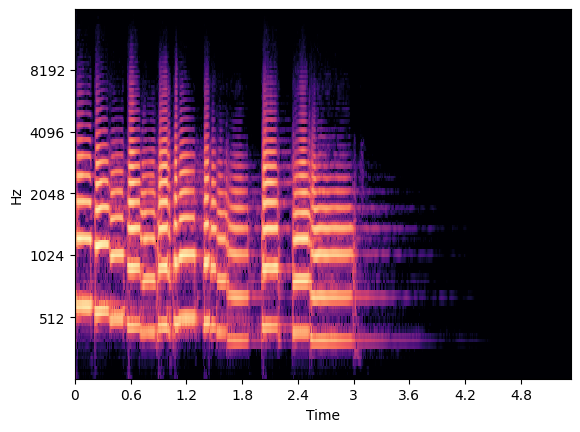

In [9]:
S = librosa.feature.melspectrogram(y = y, sr = sr, n_fft = n_fft, hop_length = hop_length, fmin = fmin, fmax = fmax, n_mels = n_mels)

fig, ax = plt.subplots()
librosa.display.specshow(librosa.power_to_db(S, ref = np.max), y_axis = 'mel', x_axis = 'time', sr = sr, hop_length = hop_length, fmin = fmin, fmax = fmax, ax = ax)

In [10]:
#using librosa defaults
odf_default = librosa.onset.onset_strength(y = y, sr = sr, hop_length = hop_length)
onset_default = librosa.onset.onset_detect(y = y, sr = sr, hop_length = hop_length, units = 'time')

# using superflex method; less false positives and less susceptible to vibrato
odf_sf = librosa.onset.onset_strength(S = librosa.power_to_db(S, ref = np.max), sr = sr, hop_length = hop_length, lag = lag, max_size = max_size)
onset_sf = librosa.onset.onset_detect(onset_envelope = odf_sf, sr = sr, hop_length = hop_length, units = 'time')

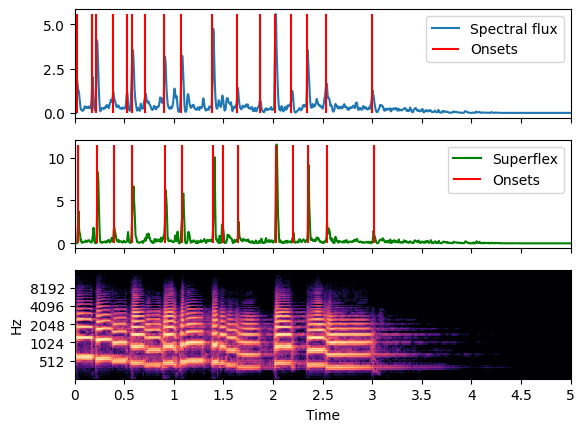

In [11]:
fig, ax = plt.subplots(nrows = 3, sharex = True)
frame_time = librosa.frames_to_time(np.arange(len(odf_default)), sr = sr, hop_length = hop_length)

librosa.display.specshow(librosa.power_to_db(S, ref = np.max), y_axis = 'mel', x_axis = 'time', sr = sr, hop_length = hop_length, fmin = fmin, fmax = fmax, ax = ax[2])

ax[2].set(xlim = [0, 5.0])

ax[0].plot(frame_time, odf_default, label = 'Spectral flux')
ax[0].vlines(onset_default, 0, odf_default.max(), color = 'r', label = 'Onsets')
ax[0].legend()
ax[0].label_outer()

ax[1].plot(frame_time, odf_sf, color = 'g', label = 'Superflex')
ax[1].vlines(onset_sf, 0, odf_sf.max(), color = 'r', label = 'Onsets')
ax[1].legend()
ax[0].label_outer()